OLS Coefficients: [ 0.00000000e+00 -1.49158632e+15 -4.21944354e+15  3.27946752e+15
  7.42398452e+15]
Ridge Coefficients: [ 0.00000000e+00 -1.38531621e+15 -3.72178650e+15  3.15729718e+15
  6.91632709e+15]


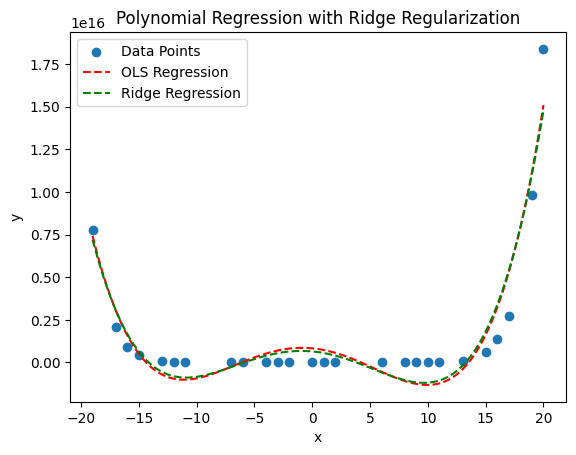

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

# Given values
xi15 = 0
xi16 = [(6, 12567651201.82), (0, 0), (2, 38741.26), (1, 2.04), (16, 1357805367258804.2), (-17, 2072635277622896.8),
        (17, 2729549049402658), (-13, 81150262565391.33), (9, 1393413370473.82), (-16, 936019754390944.8),
        (8, 362742314705.59), (-12, 30420150976262.49), (11, 15573770477440.56), (-11, 10292754965525.01),
        (-19, 7741195040928177), (-4, 40631959.89), (-6, 6139931500.47), (20, 18390950336643124),
        (15, 613156727233750.4), (-2, 14169.69), (10, 5185510756260.47), (19, 9837704362158926),
        (-15, 464121018168261.7), (13, 109619070808140.6), (-7, 42391443738.06), (-3, 1333179.91)]

# Data preparation
x = np.array([point[0] for point in xi16]).reshape(-1, 1)
y = np.array([point[1] for point in xi16])

# Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Model selection
if xi15 == 0:
    degree = 4  # Lower-degree polynomial for stability
else:
    degree = 4  # Adjust as needed

# OLS estimation
model_ols = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
model_ols.fit(x_scaled, y)
ols_params = model_ols.named_steps['linearregression'].coef_

# Ridge regression
alpha = 0.1  # Regularization strength (tune as needed)
model_ridge = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=alpha))
model_ridge.fit(x_scaled, y)
ridge_params = model_ridge.named_steps['ridge'].coef_

# Print coefficients
print(f"OLS Coefficients: {ols_params}")
print(f"Ridge Coefficients: {ridge_params}")

# Graphical representation
x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
y_ols = model_ols.predict(x_range_scaled)
y_ridge = model_ridge.predict(x_range_scaled)

plt.scatter(x, y, label='Data Points')
plt.plot(x_range, y_ols, label='OLS Regression', linestyle='--', color='red')
plt.plot(x_range, y_ridge, label='Ridge Regression', linestyle='--', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with Ridge Regularization')
plt.legend()
plt.show()
